# Proyek Analisis Data: E-Commerce Public Dataset Analysis
- **Nama:** Muh Haikal Akbar
- **Email:** haikalakbar10k@gmail.com
- **ID Dicoding:** haikalakbar

## Menentukan Pertanyaan Bisnis

- Berapa rata-rata nilai yang dikeluarkan oleh pelanggan per-transaksi, dan rata-rata pelanggan menggunakan metode pembayaran apa?
- 5 besar total penjualan berdasarkan kategori?

## Import Semua Packages/Library yang Digunakan

In [119]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

## Data Wrangling

### Gathering Data

In [120]:
order_data = pd.read_csv("./data/orders_dataset.csv")
customer_data = pd.read_csv("./data/customers_dataset.csv")
order_reviews = pd.read_csv("./data/order_reviews_dataset.csv")
order_items = pd.read_csv("./data/order_items_dataset.csv")
order_payment = pd.read_csv("./data/order_payments_dataset.csv")
product_data = pd.read_csv("./data/products_dataset.csv")
product_name = pd.read_csv("./data/product_category_name_translation.csv")
geo_data = pd.read_csv("./data/geolocation_dataset.csv")

Berdasarkan pertanyaan bisnis, maka dataset yang digunakan adalah : 
1. order_reviews_dataset.csv
2. orders_dataset.csv
3. order_items_dataset.csv
4. order_payments_dataset.csv
5. products_dataset.csv
6. product_category_name_translation.csv

#### Menampilkan Daftar kolom pada setiap Data Frame 

In [121]:
list_df = {"order_data" : order_data, 
           "order_reviews" : order_reviews, 
           "order_items" : order_items, 
           "order_payment" : order_payment, 
           "product_data" : product_data, 
           "product_name" : product_name,
           "customer_data": customer_data}

for name, df in list_df.items():
    print(f"{"--" * 20}")
    print(f"{name.upper()} DataFrame Columns")
    print(f"{"--" * 20}")
    print(df.info())
    print(f"{"--" * 20}\n")

----------------------------------------
ORDER_DATA DataFrame Columns
----------------------------------------
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99441 entries, 0 to 99440
Data columns (total 8 columns):
 #   Column                         Non-Null Count  Dtype 
---  ------                         --------------  ----- 
 0   order_id                       99441 non-null  object
 1   customer_id                    99441 non-null  object
 2   order_status                   99441 non-null  object
 3   order_purchase_timestamp       99441 non-null  object
 4   order_approved_at              99281 non-null  object
 5   order_delivered_carrier_date   97658 non-null  object
 6   order_delivered_customer_date  96476 non-null  object
 7   order_estimated_delivery_date  99441 non-null  object
dtypes: object(8)
memory usage: 6.1+ MB
None
----------------------------------------

----------------------------------------
ORDER_REVIEWS DataFrame Columns
-------------------------------

#### Menyatukan semua data menjadi satu DataFrame

In [122]:
data = order_data.merge(order_items, how="inner", on="order_id", suffixes=("", "dup")).merge(customer_data, how="inner", on="customer_id", suffixes=("", "dup")).merge(product_data, how="inner", on="product_id", suffixes=("", "dup")).merge(product_name, how="inner", on="product_category_name", suffixes=("", "dup")).merge(order_payment, how="inner", on="order_id").merge(order_reviews, how="inner", on="order_id", suffixes=("", "dup"))

data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 115609 entries, 0 to 115608
Data columns (total 37 columns):
 #   Column                         Non-Null Count   Dtype  
---  ------                         --------------   -----  
 0   order_id                       115609 non-null  object 
 1   customer_id                    115609 non-null  object 
 2   order_status                   115609 non-null  object 
 3   order_purchase_timestamp       115609 non-null  object 
 4   order_approved_at              115595 non-null  object 
 5   order_delivered_carrier_date   114414 non-null  object 
 6   order_delivered_customer_date  113209 non-null  object 
 7   order_estimated_delivery_date  115609 non-null  object 
 8   order_item_id                  115609 non-null  int64  
 9   product_id                     115609 non-null  object 
 10  seller_id                      115609 non-null  object 
 11  shipping_limit_date            115609 non-null  object 
 12  price                         

### Assessing Data

#### Drop Kolom yang tidak digunakan

In [123]:
data_order = data.copy()

data_order.drop(columns=["product_name_lenght",
                         "product_description_lenght",
                         "product_photos_qty",
                         "product_category_name",
                         "review_comment_title",
                         "review_comment_message",
                         "review_creation_date",
                         "review_answer_timestamp",
                         "customer_unique_id",
                         "product_weight_g",
                         "product_length_cm",
                         "product_height_cm",
                         "product_width_cm",
                         "order_delivered_carrier_date", 
                         "review_id",
                         "payment_sequential",
                         "seller_id",
                         "shipping_limit_date",
                         "customer_zip_code_prefix"], inplace=True)

data_order.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 115609 entries, 0 to 115608
Data columns (total 18 columns):
 #   Column                         Non-Null Count   Dtype  
---  ------                         --------------   -----  
 0   order_id                       115609 non-null  object 
 1   customer_id                    115609 non-null  object 
 2   order_status                   115609 non-null  object 
 3   order_purchase_timestamp       115609 non-null  object 
 4   order_approved_at              115595 non-null  object 
 5   order_delivered_customer_date  113209 non-null  object 
 6   order_estimated_delivery_date  115609 non-null  object 
 7   order_item_id                  115609 non-null  int64  
 8   product_id                     115609 non-null  object 
 9   price                          115609 non-null  float64
 10  freight_value                  115609 non-null  float64
 11  customer_city                  115609 non-null  object 
 12  customer_state                

#### Mengecek Apakah terdapat Null Values (Nilai yang kosong)/Duplicate Values (Nilai ganda)

In [124]:
print(f"Total Duplicate Rows : {data_order.duplicated().sum()}\n")
print(f"Total Null Rows : \n{data_order.isna().sum()}")

Total Duplicate Rows : 1066

Total Null Rows : 
order_id                            0
customer_id                         0
order_status                        0
order_purchase_timestamp            0
order_approved_at                  14
order_delivered_customer_date    2400
order_estimated_delivery_date       0
order_item_id                       0
product_id                          0
price                               0
freight_value                       0
customer_city                       0
customer_state                      0
product_category_name_english       0
payment_type                        0
payment_installments                0
payment_value                       0
review_score                        0
dtype: int64


#### Cek tipe data pada setiap kolom

In [125]:
order_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99441 entries, 0 to 99440
Data columns (total 8 columns):
 #   Column                         Non-Null Count  Dtype 
---  ------                         --------------  ----- 
 0   order_id                       99441 non-null  object
 1   customer_id                    99441 non-null  object
 2   order_status                   99441 non-null  object
 3   order_purchase_timestamp       99441 non-null  object
 4   order_approved_at              99281 non-null  object
 5   order_delivered_carrier_date   97658 non-null  object
 6   order_delivered_customer_date  96476 non-null  object
 7   order_estimated_delivery_date  99441 non-null  object
dtypes: object(8)
memory usage: 6.1+ MB


**Insight:**
- Terdapat 1066 baris ganda (duplicated)
- Tedapat Null Values pada kolom "order_delivered_customer_date" (14) dan "order_estimated_delivery_date" (2400)
- Terdapat beberapa kolom invalid Value (Tidak sesuai dengan tipe data seharusnya)

### Cleaning Data

#### Drop baris Duplicate dan Null

In [126]:
order_data_fix = data_order.copy()
order_data_fix.drop_duplicates(inplace=True)
order_data_fix.dropna(inplace=True)
print(f"Total Duplicate Rows : {order_data_fix.duplicated().sum()}\n")
print(f"Total Null Rows : \n{order_data_fix.isna().sum()}")

Total Duplicate Rows : 0

Total Null Rows : 
order_id                         0
customer_id                      0
order_status                     0
order_purchase_timestamp         0
order_approved_at                0
order_delivered_customer_date    0
order_estimated_delivery_date    0
order_item_id                    0
product_id                       0
price                            0
freight_value                    0
customer_city                    0
customer_state                   0
product_category_name_english    0
payment_type                     0
payment_installments             0
payment_value                    0
review_score                     0
dtype: int64


#### Merubah tipe data kolom invalid value

##### Kolom Numerik

In [127]:
order_data_fix["order_item_id"] = order_data_fix["order_item_id"].astype("int8")
order_data_fix["price"] = order_data_fix["price"].astype("int16")
order_data_fix["freight_value"] = order_data_fix["freight_value"].astype("int16")
order_data_fix["payment_installments"] = order_data_fix["payment_installments"].astype("int8")
order_data_fix["payment_value"] = order_data_fix["payment_value"].astype("int16")
order_data_fix["review_score"] = order_data_fix["review_score"].astype("int8")

##### Kolom Kategori/String

In [128]:
list_columns = ["order_status", "customer_city", "customer_state", "product_category_name_english", "payment_type", "order_id", "customer_id", "product_id"]
for col in list_columns:
    if col in order_data_fix.columns:
        order_data_fix[col] = order_data_fix[col].astype("category")
        
order_data_fix.info()

<class 'pandas.core.frame.DataFrame'>
Index: 112151 entries, 0 to 115608
Data columns (total 18 columns):
 #   Column                         Non-Null Count   Dtype   
---  ------                         --------------   -----   
 0   order_id                       112151 non-null  category
 1   customer_id                    112151 non-null  category
 2   order_status                   112151 non-null  category
 3   order_purchase_timestamp       112151 non-null  object  
 4   order_approved_at              112151 non-null  object  
 5   order_delivered_customer_date  112151 non-null  object  
 6   order_estimated_delivery_date  112151 non-null  object  
 7   order_item_id                  112151 non-null  int8    
 8   product_id                     112151 non-null  category
 9   price                          112151 non-null  int16   
 10  freight_value                  112151 non-null  int16   
 11  customer_city                  112151 non-null  category
 12  customer_state       

##### Kolom Date/Tanggal

In [129]:
date_columns = ["order_purchase_timestamp", "order_approved_at", "order_delivered_customer_date", "order_estimated_delivery_date"]

for col in date_columns:
    if col in order_data_fix.columns:
        order_data_fix[col] = pd.to_datetime(order_data_fix[col])

order_data_fix.info()

<class 'pandas.core.frame.DataFrame'>
Index: 112151 entries, 0 to 115608
Data columns (total 18 columns):
 #   Column                         Non-Null Count   Dtype         
---  ------                         --------------   -----         
 0   order_id                       112151 non-null  category      
 1   customer_id                    112151 non-null  category      
 2   order_status                   112151 non-null  category      
 3   order_purchase_timestamp       112151 non-null  datetime64[ns]
 4   order_approved_at              112151 non-null  datetime64[ns]
 5   order_delivered_customer_date  112151 non-null  datetime64[ns]
 6   order_estimated_delivery_date  112151 non-null  datetime64[ns]
 7   order_item_id                  112151 non-null  int8          
 8   product_id                     112151 non-null  category      
 9   price                          112151 non-null  int16         
 10  freight_value                  112151 non-null  int16         
 11  custo

**Insight:**
- Setelah menghapus baris yang duplikat dan kosong, kita mendapatkan data sebanyak 112.151 Baris
- Setiap kolom numerik (kecuali tanggal) menggunakan tipe data yang dapat menghemat penggunaan memori pada saat pemrosesan data kedepannya

## Exploratory Data Analysis (EDA)

### Statistical Analysis

##### Korelasi antar variabel

In [130]:
order_data_fix.corr(numeric_only=True)

,order_item_id,price,freight_value,payment_installments,payment_value,review_score
order_item_id,1.000000,-0.060873,-0.029291,0.075737,0.257413,-0.135333
price,-0.060873,1.000000,0.412459,0.281460,0.741255,0.002979
freight_value,-0.029291,0.412459,1.000000,0.187109,0.374141,-0.034322
payment_installments,0.075737,0.281460,0.187109,1.000000,0.273464,-0.044073
payment_value,0.257413,0.741255,0.374141,0.273464,1.000000,-0.081019
review_score,-0.135333,0.002979,-0.034322,-0.044073,-0.081019,1.000000


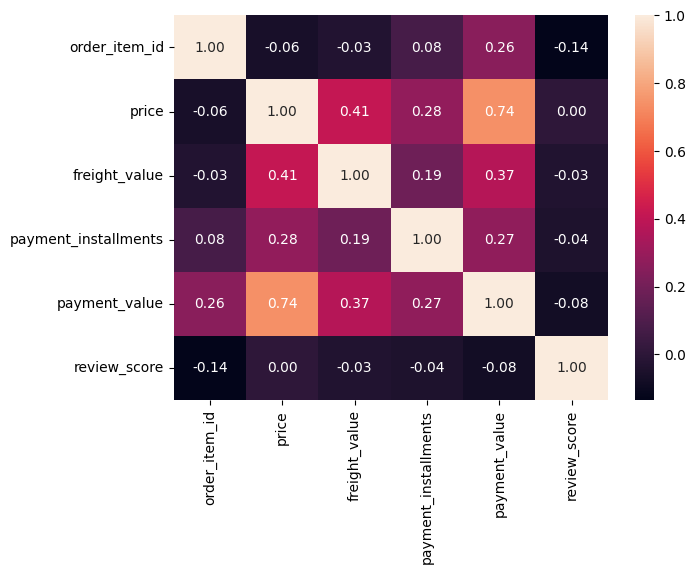

In [131]:
plt.figure(figsize=(7,5))
sns.heatmap(order_data_fix.corr(numeric_only=True), annot=True, fmt=".2f")
plt.show()

**Insight:**
- Harga produk (price) memiliki korelasi tinggi dengan nilai pembayaran (payment_value)
- Nilai review (review_score) tidak memiliki korelasi signifikan dengan variabel lainnya

##### Distribusi

Histogram

e:\submission\env\Lib\site-packages\pandas\core\nanops.py:1016: RuntimeWarning: invalid value encountered in subtract
  sqr = _ensure_numeric((avg - values) ** 2)
e:\submission\env\Lib\site-packages\pandas\core\nanops.py:1016: RuntimeWarning: invalid value encountered in subtract
  sqr = _ensure_numeric((avg - values) ** 2)


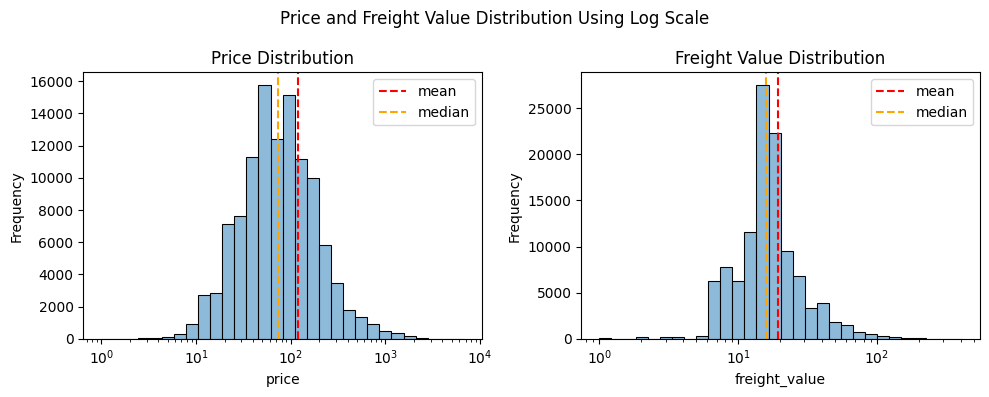

In [132]:
plt.figure(figsize=(10,4))

plt.subplot(1,2,1)
sns.histplot(order_data_fix["price"], bins=30, kde=True, log_scale=True)
plt.axvline(order_data_fix["price"].mean(), color="red", linestyle="dashed", label="mean")
plt.axvline(order_data_fix["price"].median(), color="orange", linestyle="dashed", label="median")
#plt.xlim(0, order_data_fix["price"].quantile(0.99)) # This is another alternative beside using log_scale
plt.ylabel("Frequency")
plt.title("Price Distribution")
plt.legend()

plt.subplot(1,2,2)
sns.histplot(order_data_fix["freight_value"], bins=30, kde=True, log_scale=True)
plt.axvline(order_data_fix["freight_value"].mean(), color="red", linestyle="dashed", label="mean")
plt.axvline(order_data_fix["freight_value"].median(), color="orange", linestyle="dashed", label="median")
#plt.xlim(0, order_data_fix["freight_value"].quantile(0.99)) # This is another alternative beside using log_scale
plt.ylabel("Frequency")
plt.title("Freight Value Distribution")
plt.legend()

plt.suptitle("Price and Freight Value Distribution Using Log Scale")
plt.tight_layout()
plt.show()

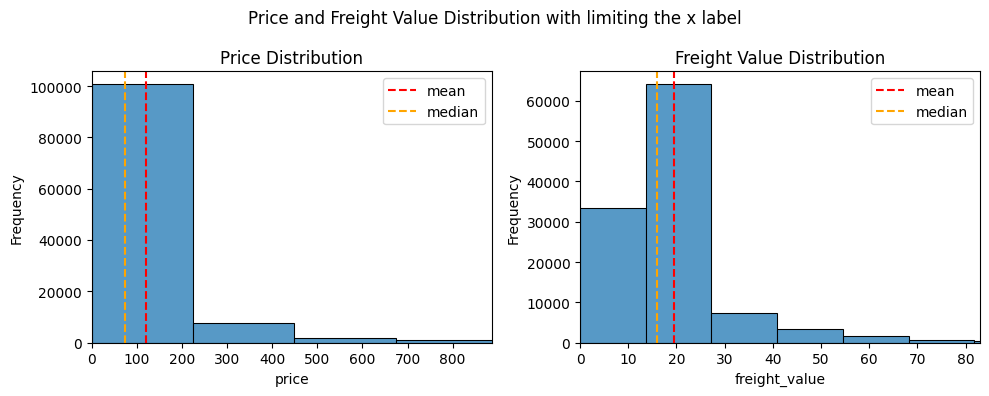

In [133]:
plt.figure(figsize=(10,4))

plt.subplot(1,2,1)
sns.histplot(order_data_fix["price"], bins=30)
plt.axvline(order_data_fix["price"].mean(), color="red", linestyle="dashed", label="mean")
plt.axvline(order_data_fix["price"].median(), color="orange", linestyle="dashed", label="median")
plt.xlim(0, order_data_fix["price"].quantile(0.99)) 
plt.ylabel("Frequency")
plt.title("Price Distribution")
plt.legend()

plt.subplot(1,2,2)
sns.histplot(order_data_fix["freight_value"], bins=30)
plt.axvline(order_data_fix["freight_value"].mean(), color="red", linestyle="dashed", label="mean")
plt.axvline(order_data_fix["freight_value"].median(), color="orange", linestyle="dashed", label="median")
plt.xlim(0, order_data_fix["freight_value"].quantile(0.99)) 
plt.ylabel("Frequency")
plt.title("Freight Value Distribution")
plt.legend()

plt.suptitle("Price and Freight Value Distribution with limiting the x label")
plt.tight_layout()
plt.show()

Boxplot

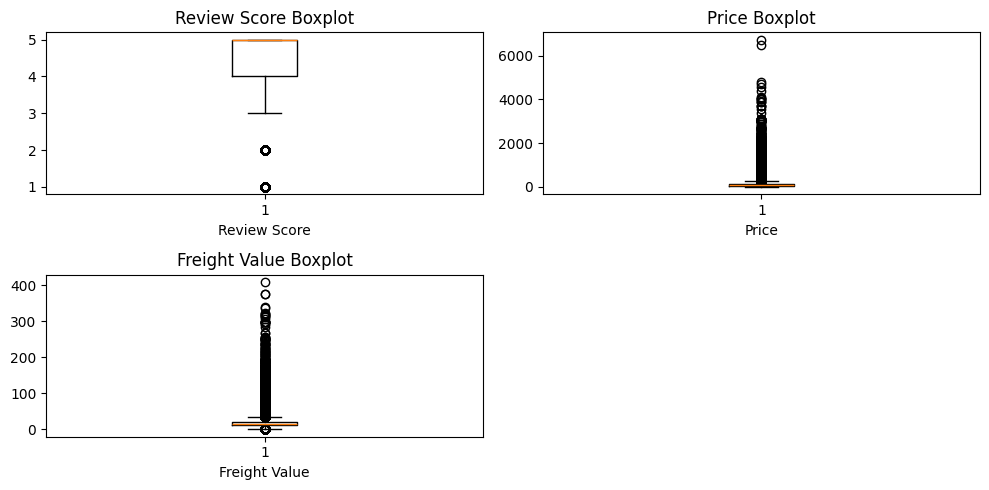

In [134]:
plt.figure(figsize=(10,5))

plt.subplot(2,2,1)
plt.boxplot(order_data_fix["review_score"])
plt.xlabel("Review Score")
plt.title("Review Score Boxplot")

plt.subplot(2,2,2)
plt.boxplot(order_data_fix["price"])
plt.xlabel("Price")
plt.title("Price Boxplot")

plt.subplot(2,2,3)
plt.boxplot(order_data_fix["freight_value"])
plt.xlabel("Freight Value")
plt.title("Freight Value Boxplot")


plt.tight_layout()
plt.show()

## Visualization & Explanatory Analysis

### Pertanyaan 1:

1. Berapa rata-rata nilai yang dikeluarkan oleh pelanggan per-transaksi, dan rata-rata pelanggan menggunakan metode pembayaran apa?

In [135]:
# Membuat data set yang normal dimana membatasi nilai menggunakan IQR
data_transaksi = order_data_fix[["payment_value", "payment_type"]].copy()

Q1 = data_transaksi["payment_value"].quantile(0.25)
Q3 = data_transaksi["payment_value"].quantile(0.75)
IQR = Q3 - Q1

upper_bound = Q3 + 1.5 * IQR # Batas atas
lower_bound = Q1 - 1.5 * IQR # Batas bawah

outliers = data_transaksi[(data_transaksi["payment_value"] > upper_bound) | (data_transaksi["payment_value"] < lower_bound)]
clean_data_transaksi = data_transaksi.drop(index=outliers.index)
clean_data_transaksi

,payment_value,payment_type
0,18,credit_card
1,2,voucher
2,18,voucher
3,141,boleto
4,179,credit_card
...,...,...
115602,155,credit_card
115603,85,credit_card
115604,195,credit_card
115605,271,credit_card


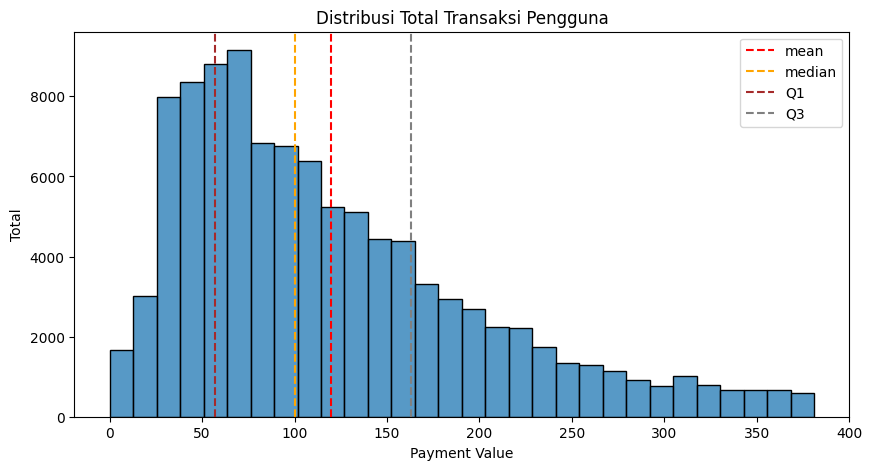

In [136]:
plt.figure(figsize=(10,5))

plt.subplot()
sns.histplot(clean_data_transaksi["payment_value"], bins=30)
plt.axvline(clean_data_transaksi["payment_value"].mean(), color="red", linestyle="dashed", label="mean")
plt.axvline(clean_data_transaksi["payment_value"].median(), color="orange", linestyle="dashed", label="median")
plt.axvline(clean_data_transaksi["payment_value"].quantile(0.25), color="brown", linestyle="dashed", label="Q1")
plt.axvline(clean_data_transaksi["payment_value"].quantile(0.75), color="grey", linestyle="dashed", label="Q3")
plt.xlabel("Payment Value")
plt.ylabel("Total")
plt.legend()
plt.title("Distribusi Total Transaksi Pengguna")

plt.show()

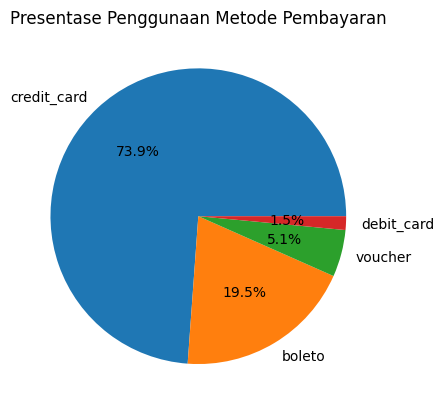

In [137]:
plt.subplot()
# Data untuk Pie Chart Jenis Pembayaran
data_pie = clean_data_transaksi[["payment_type"]].value_counts().reset_index()
plt.pie(x=data_pie["count"], labels=data_pie["payment_type"], autopct='%1.1f%%')
plt.title("Presentase Penggunaan Metode Pembayaran")
plt.show()

### Pertanyaan 2:

2. Top 5 besar total penjualan berdasarkan kategori?

In [ ]:
# Menyiapkan data
data_sales = order_data_fix[["payment_value", "order_delivered_customer_date", "product_category_name_english", "payment_type"]].copy()
# Mengubah nama kolom
data_sales.rename(columns={"payment_value":"Payment Value", "order_delivered_customer_date":"Order Date", "product_category_name_english":"Product Name", "payment_type":"Payment Type"}, inplace=True)
# Mengubah Format Tanggal dengan format (YYYY-MM)
data_sales["Order Date"] = data_sales["Order Date"].dt.strftime("%Y-%m")
data_sales

,Payment Value,Order Date,Product Name,Payment Type
0,18,2017-10,housewares,credit_card
1,2,2017-10,housewares,voucher
2,18,2017-10,housewares,voucher
3,141,2018-08,perfumery,boleto
4,179,2018-08,auto,credit_card
...,...,...,...,...
115604,195,2018-02,baby,credit_card
115605,271,2017-09,home_appliances_2,credit_card
115606,441,2018-01,computers_accessories,credit_card
115607,441,2018-01,computers_accessories,credit_card


In [186]:
# Bar chart top 5 penjualan berdasarkan kategori
data_sales_kategori = data_sales[["Payment Value","Product Name"]].copy()
top_category = data_sales_kategori.groupby(["Product Name"])["Payment Value"].sum().nlargest(5).reset_index()
top_category["Payment Value Formatted"] = top_category["Payment Value"].apply(lambda x: f"$ {x:,.0f}").replace(",",".")
top_category


C:\Users\haika\AppData\Local\Temp\ipykernel_3476\1470961150.py:3: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  top_category = data_sales_kategori.groupby(["Product Name"])["Payment Value"].sum().nlargest(5).reset_index()


,Product Name,Payment Value,Payment Value Formatted
0,bed_bath_table,1675799,"$ 1,675,799"
1,health_beauty,1601612,"$ 1,601,612"
2,computers_accessories,1548264,"$ 1,548,264"
3,furniture_decor,1382520,"$ 1,382,520"
4,watches_gifts,1376028,"$ 1,376,028"


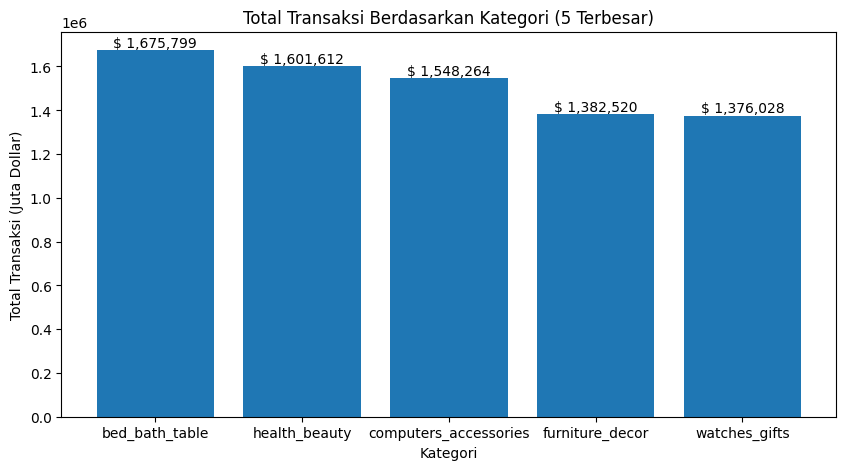

In [193]:
fig, ax = plt.subplots(figsize=(10,5))
ax.bar(x=top_category["Product Name"], height= top_category["Payment Value"])
ax.bar_label(ax.containers[0], labels = top_category["Payment Value Formatted"])
ax.set_ylabel("Total Transaksi (Juta Dollar)")
ax.set_xlabel("Kategori")
ax.set_title("Total Transaksi Berdasarkan Kategori (5 Terbesar)")
plt.show()


In [ ]:
# Rata-rata metode pembayaran yang digunakan dalam top 5 sales terbesar
top_category_name = top_category["Product Name"].to_list()
data_metode_pembayaran = data_sales[["Product Name", "Payment Type"]].copy()
data_metode_pembayaran["Product Name"] = data_metode_pembayaran["Product Name"].astype(str)
data_metode_pembayaran = data_metode_pembayaran[data_metode_pembayaran["Product Name"].isin(top_category_name)]
data_metode_pembayaran = data_metode_pembayaran.groupby(["Product Name"])["Payment Type"].value_counts().reset_index()

,Product Name,Payment Type,count
0,bed_bath_table,credit_card,8772
1,bed_bath_table,boleto,1848
2,bed_bath_table,voucher,741
3,bed_bath_table,debit_card,137
4,computers_accessories,credit_card,5310
5,computers_accessories,boleto,2098
6,computers_accessories,voucher,326
7,computers_accessories,debit_card,147
8,furniture_decor,credit_card,6200
9,furniture_decor,boleto,1704


AttributeError: 'list' object has no attribute 'patches'

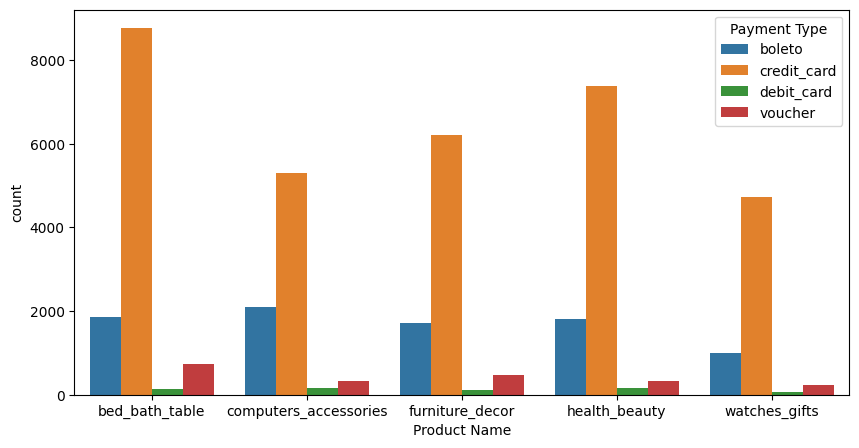

In [ ]:
plt.figure(figsize=(10,5))

plt.subplot()
ax = sns.barplot(data_metode_pembayaran, x="Product Name", y="count", hue="Payment Type")

plt.show()

In [ ]:
# Line Chart Trend Penjualan dari 5 Kategori Terbesar
data_trend = data_sales[["Payment Value", "Order Date", "Product Name"]].copy()
data_trend["Product Name"] = data_trend["Product Name"].astype(str)
data_trend = data_trend[data_trend["Product Name"].isin(top_category_name)]
data_trend = data_trend.groupby(["Order Date", "Product Name"])["Payment Value"].sum().reset_index()
data_trend

,Order Date,Product Name,Payment Value
0,2016-10,bed_bath_table,2103
1,2016-10,computers_accessories,700
2,2016-10,furniture_decor,9055
3,2016-10,health_beauty,3425
4,2016-10,watches_gifts,2792
...,...,...,...
113,2018-09,health_beauty,2907
114,2018-09,watches_gifts,1248
115,2018-10,bed_bath_table,44
116,2018-10,furniture_decor,101


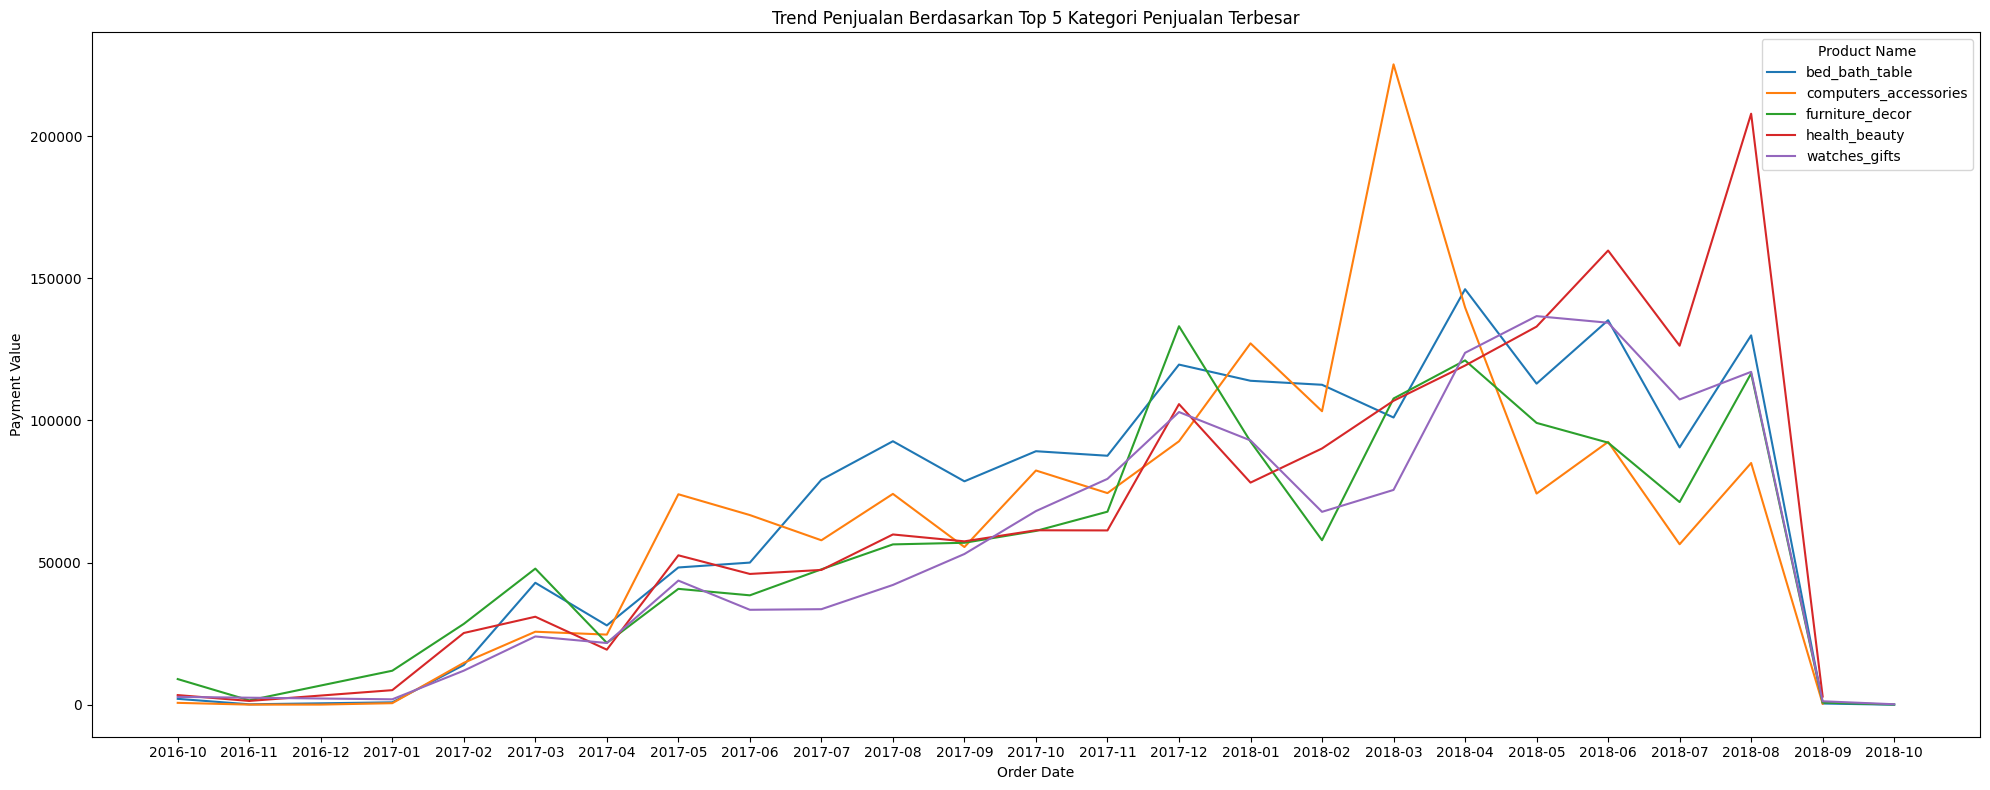

In [255]:
fig = plt.figure(figsize=(20,8))

plt.subplot()
sns.lineplot(data=data_trend, x="Order Date", y="Payment Value", hue="Product Name")
plt.title("Trend Penjualan Berdasarkan Top 5 Kategori Penjualan Terbesar")
plt.tight_layout()
plt.show()

## Conclusion

- Conclution pertanyaan 1
- Conclution pertanyaan 2